In [30]:
import numpy as np
import pandas as pd

from sklearn.base import BaseEstimator

from utils import(
uniform, rectangle, triangle,
epanechnikov, biweight, tricube,
gaussian, silverman
)
"""
Kernel module
Ref: https://github.com/scikit-learn/scikit-learn/blob/872124551/sklearn/neighbors/_kde.py#L35
"""
VALID_KERNELS = [
    "uniform",
    "rectangle",
    "triangle",
    "epanechnikov",
    "biweight",
    "tricube",
    "gaussian",
    "silverman",
]

def space_kernel(kernel, x, Xt, bandwith):
    """
    :param kernel: function
    :param x: single point in R^d
    :param Xt: single data point in R^d at time t
    :param bandwith: float
    :return:
    """
    x_Xt_scaled = (x - Xt) / bandwith
    vectorize_kernel = np.vectorize(kernel)
    kernel_vec_val = vectorize_kernel(x_Xt_scaled)
    # kernel_vec_val = kernel(x_Xt_scaled)
    return np.prod(kernel_vec_val)

def time_kernel(kernel, aT, tT, bandwith):
    atT_scaled = (tT - aT) / bandwith
    return kernel(atT_scaled)

class Kernel(BaseEstimator):
    def __init__(
            self,
            *,
            T=100,
            d=3,
            bandwith=1.0,
            space_kernel="gaussian",
            time_kernel="gaussian",
            metric="euclidean",
    ):
        self.T = T
        self.d = d
        self.bandwith = bandwith
        self.space_kernel = space_kernel
        self.time_kernel = time_kernel
        self.metric = metric


    def fit(self, X, t):
        """
        Fit the Kernel Density model on the data.
        :param X: array-like of shape (n_samples, n_features)
                List of n_features-dimensional data points.  Each row corresponds to a single data point.
        :param y:
        :return:
        """
        #self.weights_X = np.zeros(self.T)
        tT = t / self.T
        x = X[t]
        numerator = []
        denominator = []

        if self.space_kernel == "uniform" and self.time_kernel == "uniform":
            for a in range(self.T):
                Xa = X[a]
                aT = a / self.T
                space_unif_val = space_kernel(uniform, x, Xa, self.bandwith)
                time_unif_val = time_kernel(uniform, aT, tT, self.bandwith)
                numerator.append(space_unif_val * time_unif_val)
                denominator.append(space_unif_val * time_unif_val)

        elif self.space_kernel == "epanechnikov" and self.time_kernel == "epanechnikov":
            for a in range(self.T):
                Xa = X[a]
                aT = a / self.T
                space_epan_val = space_kernel(epanechnikov, x, Xa, self.bandwith)
                time_epan_val = time_kernel(epanechnikov, aT, tT, self.bandwith)
                numerator.append(space_epan_val * time_epan_val)
                denominator.append(space_epan_val * time_epan_val)

        elif self.space_kernel == "gaussian" and self.time_kernel == "gaussian":
            for a in range(self.T):
                Xa = X[a]
                aT = a / self.T
                space_gauss_val = space_kernel(gaussian, x, Xa, self.bandwith)
                time_gauss_val = time_kernel(gaussian, aT, tT, self.bandwith)
                numerator.append(space_gauss_val * time_gauss_val)
                denominator.append(space_gauss_val * time_gauss_val)

        elif self.space_kernel == "silverman" and self.time_kernel == "silverman":
            for a in range(self.T):
                Xa = X[a]
                aT = a / self.T
                space_silv_val = space_kernel(silverman, x, Xa, self.bandwith)
                time_silv_val = time_kernel(silverman, aT, tT, self.bandwith)
                numerator.append(space_silv_val * time_silv_val)
                denominator.append(space_silv_val * time_silv_val)
        else:
            raise ValueError("Kernel type not supported")
            
        weights_t = np.array(numerator) / np.array(denominator).sum()
        #self.weights_X[t] = weights_t
        return weights_t #self.weights_X

In [19]:
import numpy as np
import scipy as scp

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [149]:
T = 2000
n_replications = 500
d = 2

u_var = np.linspace(0., 1., T)

X_tvar_2 = np.zeros(T)
X_tvar_2_mean = np.zeros(T)


m_star = lambda u: 1.4 + np.sin(2 * np.pi * u)
r_star = lambda  u: 1.05
sigma_star = lambda u: 1.0

X_tvar_2_replications = np.zeros((n_replications, T))

X_dict = {}

for replication in range(n_replications):
    t = 2
    epsilon = np.random.normal(size=(T))
    X = np.zeros((T,d))
    while t <= T-1 :
        X_tvar_2[t] = 2 / r_star(t/T) * np.cos(m_star(t/T)) * X_tvar_2[t-1] - \
                        (1. / r_star(t/T) ** 2) * X_tvar_2[t-2] + sigma_star(t/T) * epsilon[t]
        X_tvar_2_mean[t] = 2 / r_star(t/T) * np.cos(m_star(t/T)) * X_tvar_2[t-1] - \
                        (1. / r_star(t/T) ** 2) * X_tvar_2[t-2]
        X[t] = [X_tvar_2[t-1], X_tvar_2[t-2]]
        t += 1
        
    X_dict[str(replication)] = X
    # X_dict.setdefault(str(replication),[]).append(X)
    X_tvar_2_replications[replication] = X_tvar_2

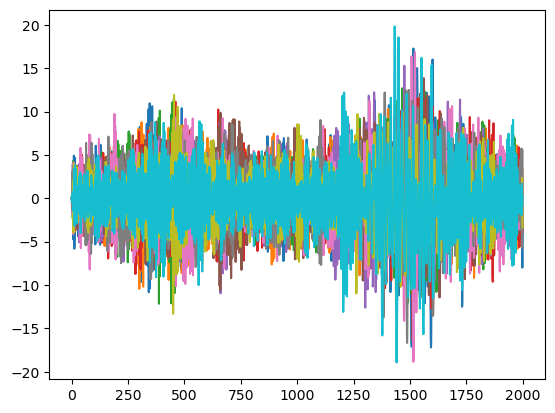

In [150]:
for replication in range(10):
    plt.plot(X_tvar_2_replications[replication])
    #plt.plot(X_tvar_2_replications[replication])

In [151]:
X_dict.keys()

dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', 

In [152]:
t = [10, 20, 50]
X_tvar_2_10 = []
X_tvar_2_20 = []
X_tvar_2_50 = []
for replication in range(n_replications):
    X_tvar_2_10.append(X_tvar_2_replications[replication][9])
    X_tvar_2_20.append(X_tvar_2_replications[replication][19])
    X_tvar_2_50.append(X_tvar_2_replications[replication][49])

In [153]:
X_tvar_2_replications.shape

(500, 2000)

In [154]:
X_tvar_2_10 = np.array(X_tvar_2_10)
X_tvar_2_20 = np.array(X_tvar_2_20)
X_tvar_2_50 = np.array(X_tvar_2_50)

<Axes: >

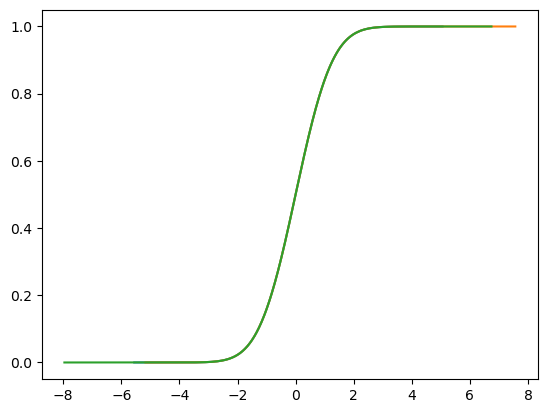

In [155]:
import scipy
import seaborn as sns
norm_X_tvar_2_10 = scipy.stats.norm.cdf(X_tvar_2_10)
norm_X_tvar_2_20 = scipy.stats.norm.cdf(X_tvar_2_20)
norm_X_tvar_2_50 = scipy.stats.norm.cdf(X_tvar_2_50)

sns.lineplot(x=X_tvar_2_10, y=norm_X_tvar_2_10)
sns.lineplot(x=X_tvar_2_20, y=norm_X_tvar_2_20)
sns.lineplot(x=X_tvar_2_50, y=norm_X_tvar_2_50)

In [156]:
## Gaussian 
xi = 0.4 / (2*(d+1))
bandwith = T **(-xi)
t = 50
gaussian_kernel = Kernel(T=T, bandwith=bandwith, space_kernel="gaussian", time_kernel="gaussian")

gaussian_weights = {}
gaussian_weights_ = {}
for replication in range(n_replications):
    gaussian_weights[str(replication)] = gaussian_kernel.fit(X_dict[str(replication)],t)
    gaussian_weights_[str(replication)] = gaussian_weights[str(replication)].sum(axis=0)

In [157]:
#weights_10 = {}
#weights_20 = {}
weights_50 = {}
for replication in range(n_replications):
    #weights_10[str(replication)] = gaussian_weights[str(replication)] 
    #weights_20[str(replication)] = gaussian_weights[str(replication)]
    weights_50[str(replication)] = gaussian_weights[str(replication)]


In [158]:
weights_50['0'].shape

(2000,)

In [120]:
import pandas as pd
df_weights = pd.DataFrame(weights_50['0'])
df_weights.head(50)
#plt.plot(weights_10['1'])

,0
0,4.626379e-15
1,4.626387e-15
2,4.626394e-15
3,3.418220e-14
4,1.507061e-08
5,2.850805e-23
6,6.715326e-62
7,6.362924e-43
8,2.864097e-06
9,1.910710e-10


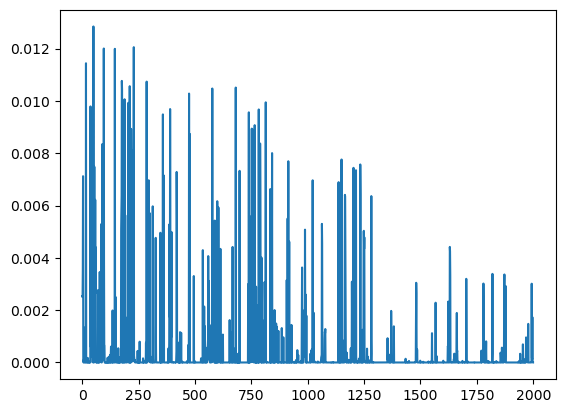

In [159]:
plt.plot(weights_50['19'])

In [160]:
replicated_NW_cdfs_50 = {}
for replication in range(n_replications):
    X_tvar_2_replication_norm = scp.stats.norm.cdf(X_tvar_2_replications[replication])
    replicated_NW_cdfs_50[str(replication)] = weights_50[str(replication)].sum(0)* X_tvar_2_replication_norm # [49] 
    # replicated_NW_cdfs_100[str(replication)] = weights_100[str(replication)]* X_tvar_2_replication_norm 

In [161]:
weights_50['0'].shape

(2000,)

In [162]:
replicated_NW_cdfs_50['0'].shape

(2000,)

<Axes: >

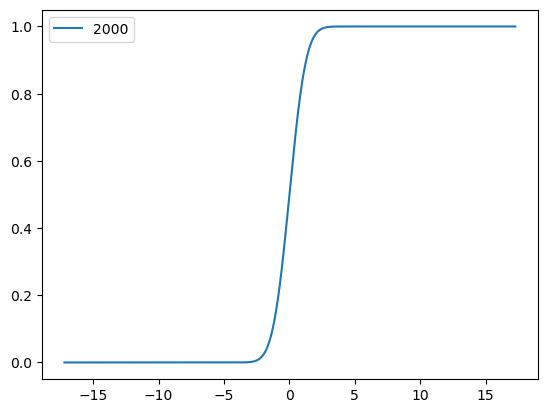

In [163]:
# X_tvar_2_replication_norm[0]
X_tvar_2_replication_norm = scp.stats.norm.cdf(X_tvar_2_replications[0])
# plt.plot(X_tvar_2_replication_norm)

sns.lineplot(x=X_tvar_2_replications[0], y=X_tvar_2_replication_norm, label=f"{T}" )

In [164]:
def eval_univariate(x, weights):
        """Inner function for ECDF of one variable."""
        sorter = x.argsort()
        x = x[sorter]
        weights = weights[sorter]
        y = weights.cumsum()

        # if self.stat in ["percent", "proportion"]:
        y = y / y.max()
        # if self.stat == "percent":
            # y = y * 100

        # x = np.r_[-np.inf, x]
        # y = np.r_[0, y]
        x = np.r_[x]
        y = np.r_[y]

        # if self.complementary:
            # y = y.max() - y

        return y, x

(500, 2000) (500, 2000)


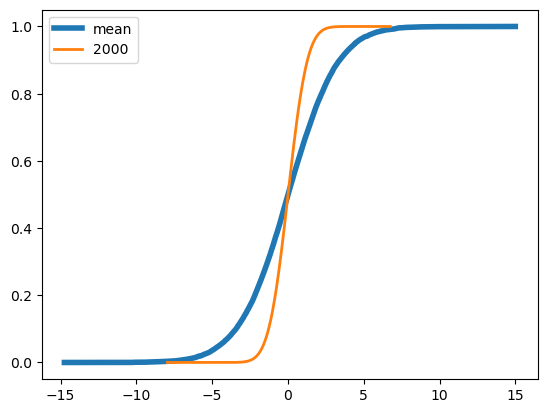

Wasserstein distance for each replication:  [0.05637387311576715, 0.06974190826687271, 0.2599404619695367, 0.19292824096133665, 0.13954031420549057, 0.1031551668733396, 0.12703267110856753, 0.19074083751254783, 0.04416586638331785, 0.0899748604978438, 0.030529417642186647, 0.1973394199442305, 0.016552571208267208, 0.11778479333035768, 0.1019414922835551, 0.07361606596226505, 0.032738375805896336, 0.1467520647325143, 0.18998851706852316, 0.084847998535866, 0.09419441946109426, 0.10921358376551345, 0.17842338281197137, 0.13103102398439584, 0.31481176845790043, 0.09296869070134406, 0.14910719103414877, 0.1331813023053328, 0.27740923483475416, 0.10553583642289051, 0.05278929602386864, 0.3272754514329238, 0.07123090493881067, 0.10939728099680025, 0.11214278953447099, 0.07515019862149153, 0.10311933716944909, 0.21516229438451873, 0.20065971770846897, 0.24807130048643158, 0.1663300753758149, 0.05477336908025468, 0.06353150382931577, 0.07139707579249455, 0.03842257725905018, 0.0957372076425606

In [165]:
from scipy.stats import wasserstein_distance
x_rep = np.zeros((n_replications, T))
y_rep = np.zeros((n_replications, T))
wasserstein_distances = []
for replication in range(n_replications): #range(n_replications):
   # sns.lineplot(x=X_tvar_2_replications[replication], y=replicated_NW_cdfs_100[str(replication)])
   # plt.ecdf(X_tvar_2_replications[replication], weights=weights_100[str(replication)][99])
   # sns.ecdfplot(data=None, x=X_tvar_2_replications[replication], weights=weights_100[str(replication)][99])
   # data = X_tvar_2_replications[replication] * weights_100[str(replication)][99]
   # plt.plot(np.sort(a), np.linspace(0., 1., len(a), endpoint=False), c='g',lw=2)
   # plt.plot(np.sort(data), np.arange(1, len(data)+1) / len(data))
    y, x = eval_univariate(X_tvar_2_replications[replication], weights_50[str(replication)])
    x_rep[replication] = x
    y_rep[replication] = y
    distance = wasserstein_distance(y, scp.stats.norm.cdf(X_tvar_2_50))
    wasserstein_distances.append(distance)
   
   
   #plt.plot(x, y, label=str(replication))
print(x_rep.shape, y_rep.shape)
plt.plot(x_rep.mean(axis=0), y_rep.mean(axis=0), label="mean", linewidth=4)
X_tvar_2_50_norm = scp.stats.norm.cdf(X_tvar_2_50)
sns.lineplot(x=X_tvar_2_50, y=X_tvar_2_50_norm, label=f"{T}", linewidth=2 )
# eval_univariate(X_tvar_2_100_norm)
# plt.legend()
plt.show()

#print("Mean values of y_rep across replications:", y_rep.mean(axis=0))
#y_rep.mean(axis=0).shape
print("Wasserstein distance for each replication: ", wasserstein_distances)

In [166]:
#x_mean_pi_NW_cdfs_50 = x_rep.mean(axis=0)
y_mean_pi_NW_cdfs_50 = y_rep.mean(axis=0)

In [167]:
from scipy.stats import wasserstein_distance
wasserstein_distance(y_mean_pi_NW_cdfs_50, X_tvar_2_50_norm)

0.09251924070111736